# Evaluation: Precision & Recall
## Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics
### We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 


In [7]:
import numpy as np
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist['data'], mnist['target']

In [41]:
import matplotlib
import matplotlib.pyplot as plt
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

### Now take a look at the shapes of the X and y matricies 

In [9]:
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


### Now, let's pick one entry and see what number is written. Use indexing to pick the 36000th digit

In [19]:
X[36000]
#y[36000]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

### You can use the .reshape(28,28) function and plt.imshow() function with the parameters cmap = matplotlib.cm.binary, interpolation="nearest" to make a plot of the number. Be sure to import matplotlib!

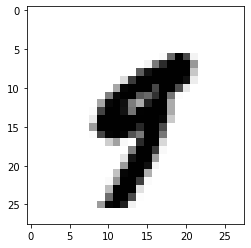

In [17]:
plt.imshow(X[36000].reshape(28,28), cmap=matplotlib.cm.binary, interpolation='nearest')

### Use indexing to see if what the plot shows matches with the outcome of the 36000th index

In [18]:
y[36000]

'9'

### Now lets break into a test train split to run a classification. Instead of using sklearn, use indexing to select the first 60000 entries for the training, and the rest for training.

In [21]:
X_train = X[:59999]
X_test = X[60000:]
y_train = y[:59999]
y_test = y[60000:]

### We are going to make a two-class classifier, so lets restrict to just one number, for example 5s. Do this by defining a new y training and y testing sets for just the number 5

In [26]:
y_train5 = np.where(y_train=='5', 1, 0)
y_test5 = np.where(y_test=='5', 1, 0)
y_test5

array([0, 0, 0, ..., 0, 1, 0])

### Lets train a logistic regression to predict if a number is a 5 or not (remember to use the 'just 5s' y training set!)

In [30]:
nb_model = LogisticRegression().fit(X_train, y_train5)

C:\Users\sarah\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Does the classifier predict correctly the 36000th digit we picked before?

In [45]:
y_pred_train = nb_model.predict(X_train)
y_pred_test = nb_model.predict(X_test)

y_pred_train[36000]
#Yes, because y[36000] is a 9, and classifier predicted it as 'not 5'
y_test

array(['7', '2', '1', ..., '4', '5', '6'], dtype=object)

### To make some comparisons, we are going to make a very dumb classifier, that never predicts 5s. Build the classifier with the code below, and call it using: never_5_clf = Never5Classifier()

In [77]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()

### Now lets fit and predict on the testing set using our never 5 Classifier

In [71]:
never_5_clf.fit(X_train)
y_pred5 = never_5_clf.predict(X_test)
#y_pred5

### Let's compare this to the Logistic Regression. Examine the confusion matrix, precision, recall, and f1_scores for each. What is the probability cutoff you are using to decide the classes?

In [72]:
print('Confusion Matrix for Logisitc Regression Classifier:\n', metrics.confusion_matrix(y_test5, y_pred_test))

print('\nConfusion Matrix for "Never 5" Classifier:\n', metrics.confusion_matrix(y_test5, y_pred5))


Confusion Matrix for Logisitc Regression Classifier:
 [[9037   71]
 [ 149  743]]

Confusion Matrix for "Never 5" Classifier:
 [[9108    0]
 [ 892    0]]


In [73]:
precision = metrics.precision_score(y_test5, y_pred_test)
recall = metrics.recall_score(y_test5, y_pred_test)
f1_score = metrics.f1_score(y_test5, y_pred_test)

precision_never5 = metrics.precision_score(y_test5, y_pred5)
recall_never5 = metrics.recall_score(y_test5, y_pred5)
f1_score_never5 = metrics.f1_score(y_test5, y_pred5)

print(precision, precision_never5)
print(recall, recall_never5)
print(f1_score, f1_score_never5)

0.9127764127764127 0.0
0.8329596412556054 0.0
0.8710433763188745 0.0


C:\Users\sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### What are the differences you see? Without knowing what each model is, what can these metrics tell you about how well each works?

In [ ]:
#Because the 'never5' returns a list of 0s, it means it misclassified all the potential 5s in the data..

### Now let's examine the roc_curve for each. Use the roc_curve method from sklearn.metrics to help plot the curve for each

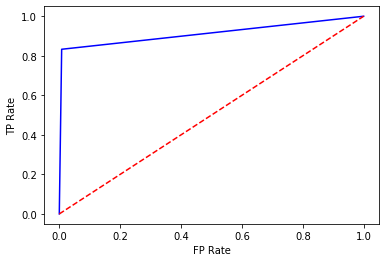

In [88]:
# Logistic Regression
fpr, tpr, threshold = metrics.roc_curve(y_test5, y_pred_test)
plt.plot(fpr, tpr, 'b')
plt.plot([0, 1], [0, 1], 'r--')
plt.ylabel('TP Rate')
plt.xlabel('FP Rate')
plt.show()



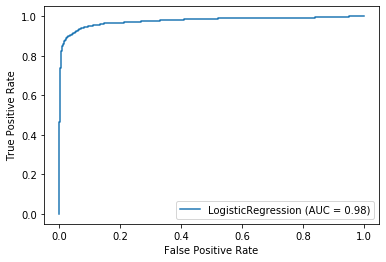

In [91]:
metrics.plot_roc_curve(nb_model, X_test, y_test5)
#What's that function for ??

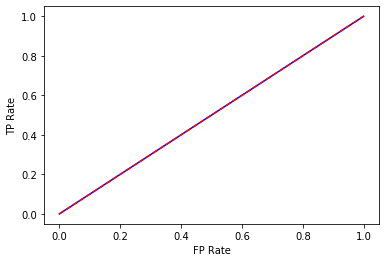

In [89]:
fpr, tpr, threshold = metrics.roc_curve(y_test5, y_pred5)
plt.plot(fpr, tpr, 'b')
plt.plot([0, 1], [0, 1], 'r--')
plt.ylabel('TP Rate')
plt.xlabel('FP Rate')
plt.show()

### Now find the roc_auc_score for each. 

In [90]:
print(metrics.roc_auc_score(y_test5, y_pred_test))
print(metrics.roc_auc_score(y_test5, y_pred5))

0.9125821482518693
0.5


### What does this metric tell you? Which classifier works better with this metric in mind?

The first classifier works better.
The second one is the 'worst case scenario'